(getting-started)=

# Getting Started

In [1]:
import jax

jax.config.update("jax_enable_x64", True)

## Keplerian system

In jaxoplanet, a keplerian system can be instantiated with a [Central](jaxoplanet.orbit.keplerian.Central) object

In [26]:
from jaxoplanet.orbits.keplerian import System, Central

system = System(Central())  # a central object with some default parameters

and add an orbiting [Body](jaxoplanet.orbit.keplerian.Body) 

In [27]:
system = system.add_body(period=0.1)

As many arguments are optional, it's always a good idea to check the parameters of the system.

In [4]:
system

System(
  central=Central(
    mass=<Quantity(1.0, 'M_sun')>,
    radius=<Quantity(1.0, 'R_sun')>,
    density=<Quantity(0.238732415, 'M_sun / R_sun ** 3')>
  ),
  _body_stack=ObjectStack(...)
)

For the reminder of this notebook, let's define a system consisting of an Earth-like planet orbiting a Sun-like star.

In [5]:
from jaxoplanet.units import unit_registry as ureg

sun = Central(
    radius=1.0 * ureg.R_sun,
    mass=1.0 * ureg.M_sun,
)

system = System(sun).add_body(
    semimajor=1.0 * ureg.au,
    radius=1.0 * ureg.R_earth,
    mass=1.0 * ureg.M_earth,
)

earth = system.bodies[0]

# checking the parameters of the system
system

```{note}

Notice the use of the [jaxoplanet.units]() module to handle physical units. Check [TODO]() for an introduction to the unit system used by jaxoplanet.

```

# Radial velocity

Using the [KeplarianOrbit]() object, one can access the relative position and velocity of the planet relative to the sun. 

In [7]:
import jax.numpy as jnp
from matplotlib import pyplot as plt

# Get the position of the planet and velocity of the star as a function of time
t = jnp.linspace(0, 730, 5000)
x, y, z = earth.relative_position(t)
vx, vy, vz = earth.central_velocity(t)

```{note}
Axes and orbital parameters conventions follow that of the [*exoplanet* package](https://docs.exoplanet.codes/en/latest/tutorials/data-and-models/).
```

And plot the results

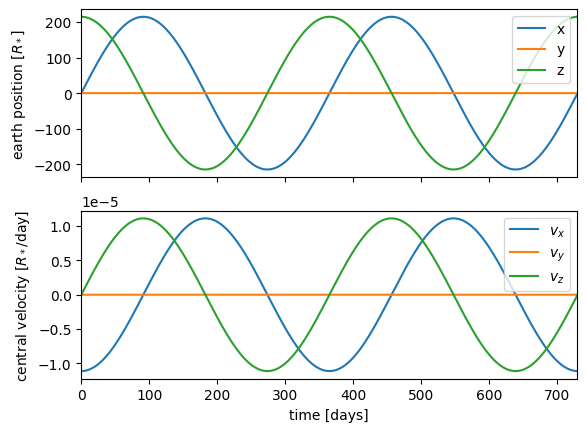

In [8]:
fig, axes = plt.subplots(2, 1, sharex=True)
ax = axes[0]
ax.plot(t, x.magnitude, label="x")
ax.plot(t, y.magnitude, label="y")
ax.plot(t, z.magnitude, label="z")
ax.set_ylabel("earth position [$R_*$]")
ax.legend(fontsize=10, loc=1)

ax = axes[1]
ax.plot(t, vx.magnitude, label="$v_x$")
ax.plot(t, vy.magnitude, label="$v_y$")
ax.plot(t, vz.magnitude, label="$v_z$")
ax.set_xlim(t.min(), t.max())
ax.set_xlabel("time [days]")
ax.set_ylabel("central velocity [$R_*$/day]")
_ = ax.legend(fontsize=10, loc=1)

## Light curve

jaxoplanet contains module to compute occultation light curves of stars given different photosphere properties. For example, we can define a limb-darkened [light_curve](jaxoplanet.light_curves.limb_dark.light_curve) to compute the flux of a star with a polynomial limb darkening, allowing to express linear, quadratic and more complex laws.

Using the limb-darkening coefficients from [Hestroffer and Magnan](https://www.physics.hmc.edu/faculty/esin/a101/limbdarkening.pdf) we compute the flux

In [23]:
from jaxoplanet.light_curves.limb_dark import light_curve

u = (0.30505, 1.13123, -0.78604, 0.40560, 0.02297, -0.07880)
time = jnp.linspace(-0.5, 0.5, 1000)

flux = 1.0 + light_curve(system, u)(time)

and plot the resulting light curve

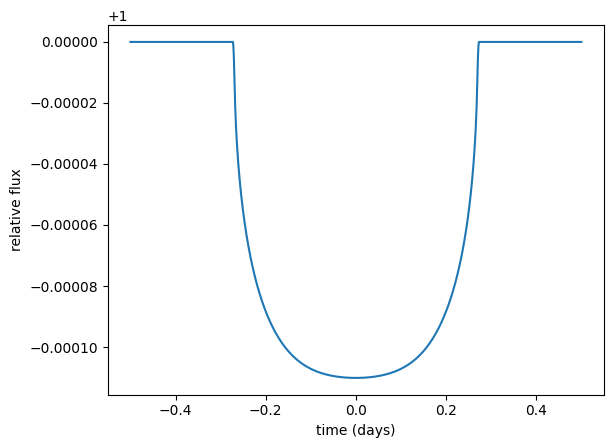

In [25]:
plt.plot(time, flux)
plt.xlabel("time (days)")
_ = plt.ylabel("relative flux")